In [ ]:
import pandas as pd
import numpy as np
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns

   Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  \
0      1     1 2010-02-05      24924.50      False        42.31       2.572   
1      1     1 2010-02-12      46039.49       True        38.51       2.548   
2      1     1 2010-02-19      41595.55      False        39.93       2.514   
3      1     1 2010-02-26      19403.54      False        46.63       2.561   
4      1     1 2010-03-05      21827.90      False        46.50       2.625   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        0.0        0.0        0.0        0.0        0.0  211.096358   
1        0.0        0.0        0.0        0.0        0.0  211.242170   
2        0.0        0.0        0.0        0.0        0.0  211.289143   
3        0.0        0.0        0.0        0.0        0.0  211.319643   
4        0.0        0.0        0.0        0.0        0.0  211.350143   

   Unemployment Type    Size source  
0         8.106    A  151315  train  
1         8.106 

In [ ]:
PROCESSED_PATH = '../data/processed/' # Note: relative path from notebooks dir
DATABASE_NAME = 'walmart_sales.db'
DATABASE_URI = f'sqlite:///{PROCESSED_PATH}{DATABASE_NAME}'
TABLE_NAME = 'walmart_sales'

engine = sqlalchemy.create_engine(DATABASE_URI)
df = pd.read_sql_table(TABLE_NAME, engine)
df['Date'] = pd.to_datetime(df['Date'])

print(df.head())
print(df.info())

In [2]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,source
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315,train
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315,train
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315,train
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315,train
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,45,98,2013-06-28,NaN,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,193.589304,8.335,B,118221,test
536630,45,98,2013-07-05,NaN,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,193.589304,8.335,B,118221,test
536631,45,98,2013-07-12,NaN,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,193.589304,8.335,B,118221,test
536632,45,98,2013-07-19,NaN,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,193.589304,8.335,B,118221,test


Sales Trends

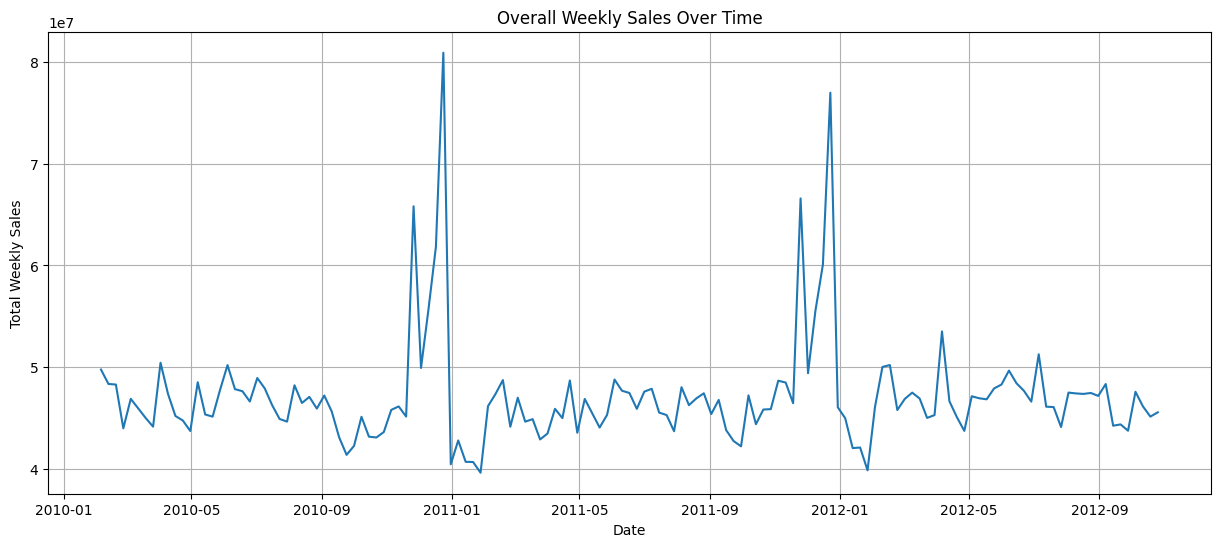

In [12]:
df['Weekly_Sales'] = pd.to_numeric(df['Weekly_Sales'], errors='coerce')
df.dropna(subset=['Weekly_Sales'], inplace=True) # Remove rows where sales couldn't be converted


# Overall Sales over time (aggregate by date)
sales_by_date = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15, 6))
sns.lineplot(data=sales_by_date, x='Date', y='Weekly_Sales')
plt.title('Overall Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()


Holidays vs non-Holidays

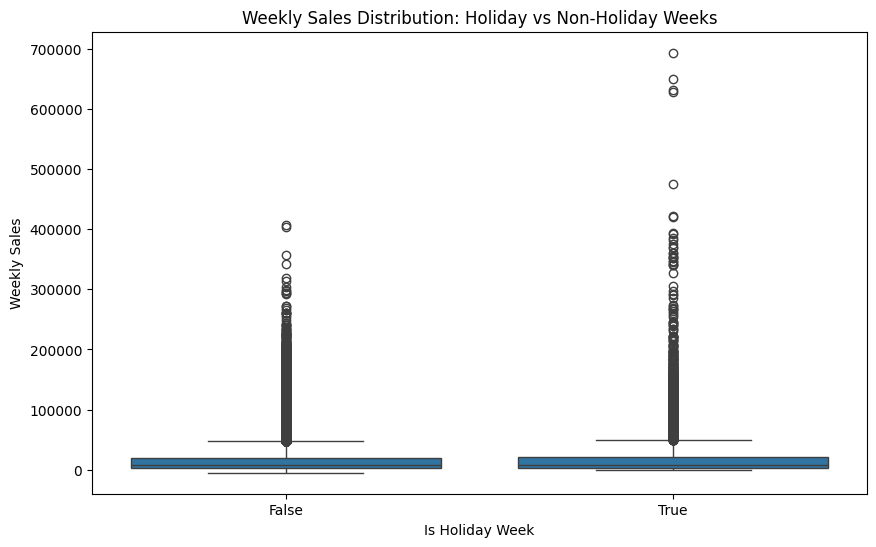

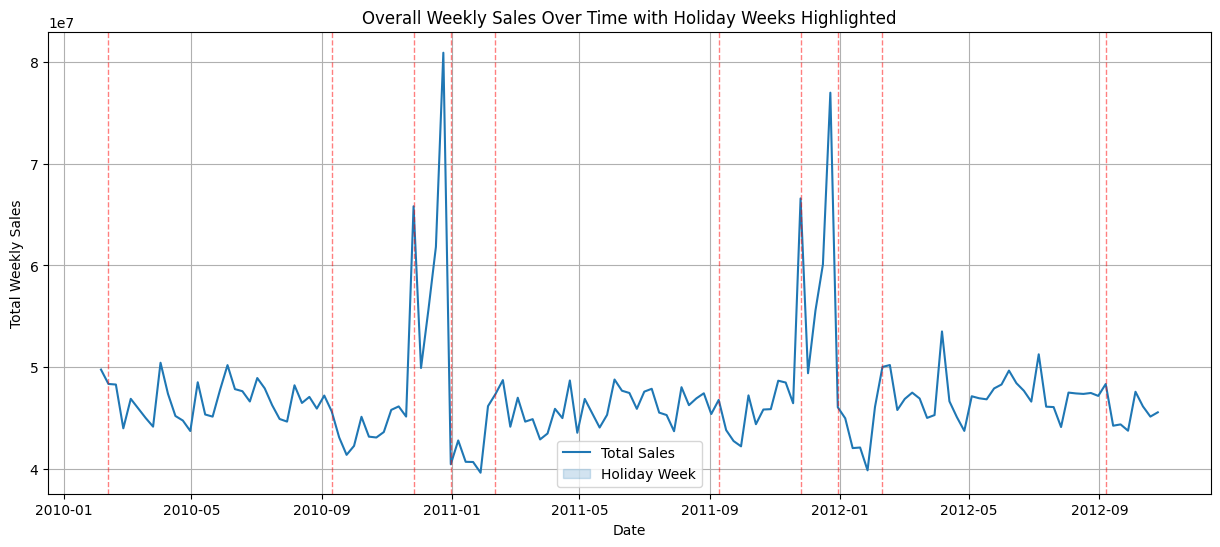

In [13]:
plt.figure(figsize=(10, 6))
# Filter out extreme outliers for better plot scale if needed, e.g., sales < 100000
# sns.boxplot(data=df[df['Weekly_Sales'] < 100000], x='IsHoliday', y='Weekly_Sales')
sns.boxplot(data=df, x='IsHoliday', y='Weekly_Sales')
plt.title('Weekly Sales Distribution: Holiday vs Non-Holiday Weeks')
plt.xlabel('Is Holiday Week')
plt.ylabel('Weekly Sales')
plt.xticks([0, 1], ['False', 'True'])
# Add median labels if desired (more advanced)
plt.show()

# Optional: Plot sales over time and highlight holiday weeks
plt.figure(figsize=(15, 6))
sns.lineplot(data=sales_by_date, x='Date', y='Weekly_Sales', label='Total Sales')
holiday_dates = sales_by_date[sales_by_date['Date'].isin(df[df['IsHoliday'] == True]['Date'].unique())]['Date']
# Plot vertical lines or markers for holiday dates
for date in holiday_dates:
        plt.axvline(date, color='red', linestyle='--', lw=1, alpha=0.5)
plt.title('Overall Weekly Sales Over Time with Holiday Weeks Highlighted')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.legend(['Total Sales', 'Holiday Week']) # Legend might be tricky with axvline
plt.grid(True)
plt.show()

Negative Sales

In [5]:
negative_sales_df = df[df['Weekly_Sales'] < 0]

In [7]:
neg_sales_counts = negative_sales_df.groupby(['Store', 'Dept']).size().reset_index(name='count')
print("\nStores/Departments with negative sales counts (Top 10):")
print(neg_sales_counts.sort_values(by='count', ascending=False).head(10))


Stores/Departments with negative sales counts (Top 10):
     Store  Dept  count
277     35    80     25
270     35    47     20
271     35    49     20
63      10    47     19
339     42    72     16
308     39    19     16
278     35    94     14
151     20    19     14
250     32    18     13
123     17    41     13


In [8]:
neg_sales_holiday_counts = negative_sales_df.groupby('IsHoliday').size().reset_index(name='count')
print("\nNegative Sales counts during Holiday vs Non-Holiday weeks:")
print(neg_sales_holiday_counts)


Negative Sales counts during Holiday vs Non-Holiday weeks:
   IsHoliday  count
0      False   1187
1       True     98


Sales by Store

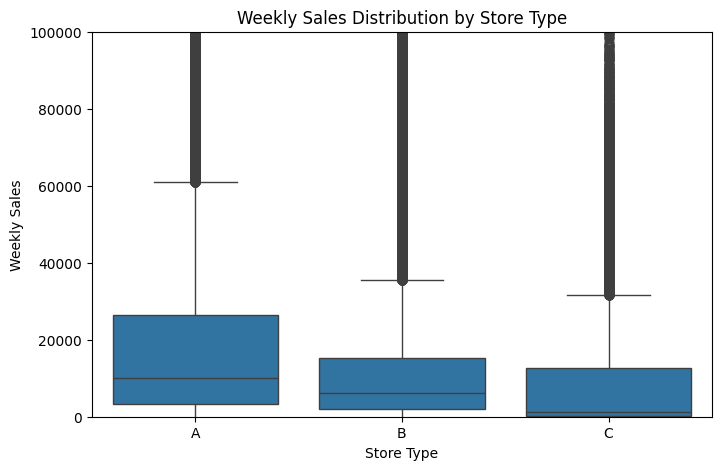

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Type', y='Weekly_Sales')
plt.title('Weekly Sales Distribution by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.ylim(0, 100000) # Limit y-axis for better visualization, ignore extreme outliers
plt.show()

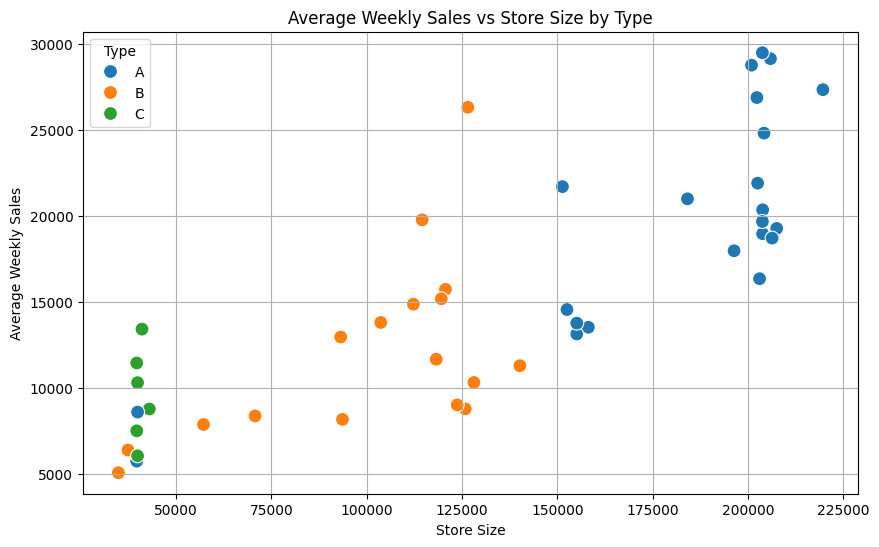

In [10]:
avg_sales_by_store = df.groupby(['Store', 'Type', 'Size'])['Weekly_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_sales_by_store, x='Size', y='Weekly_Sales', hue='Type', s=100)
plt.title('Average Weekly Sales vs Store Size by Type')
plt.xlabel('Store Size')
plt.ylabel('Average Weekly Sales')
plt.grid(True)
plt.show()

Store Performance Over Time

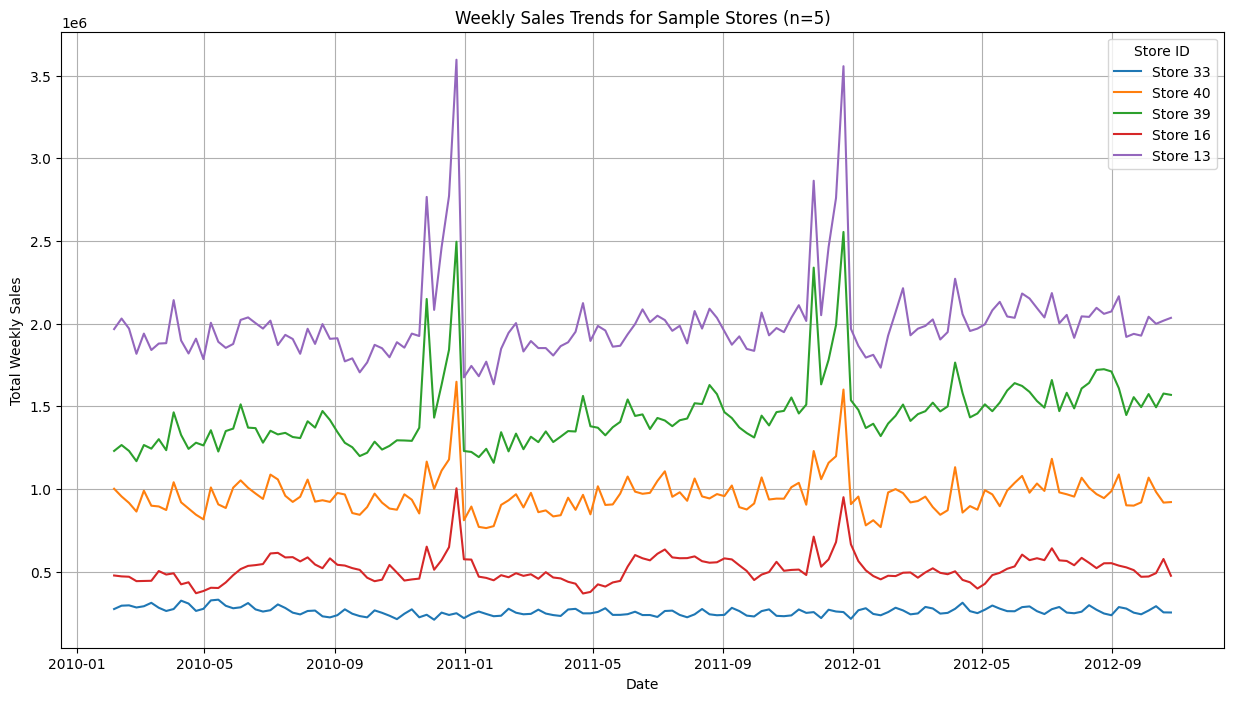

In [ ]:
# Get a list of unique store IDs
all_stores = df['Store'].unique()
# Randomly select a sample of stores
sample_stores = np.random.choice(all_stores, min(5, len(all_stores)), replace=False)

plt.figure(figsize=(15, 8))

# Plot sales trend for each sampled store
for store_id in sample_stores:
    store_df = df[(df['Store'] == store_id) & (df['source'] == 'train')].groupby('Date')['Weekly_Sales'].sum().reset_index()
    sns.lineplot(data=store_df, x='Date', y='Weekly_Sales', label=f'Store {store_id}')

plt.title(f'Weekly Sales Trends for Sample Stores (n={len(sample_stores)})')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.legend(title='Store ID')
plt.show()


Top 5 Stores by Average Weekly Sales:
    Store  Weekly_Sales
19     20  29508.301592
3       4  29161.210415
13     14  28784.851727
12     13  27355.136891
1       2  26898.070031

Bottom 5 Stores by Average Weekly Sales:
    Store  Weekly_Sales
4       5   5053.415813
32     33   5728.414053
43     44   6038.929814
2       3   6373.033983
37     38   7492.478460


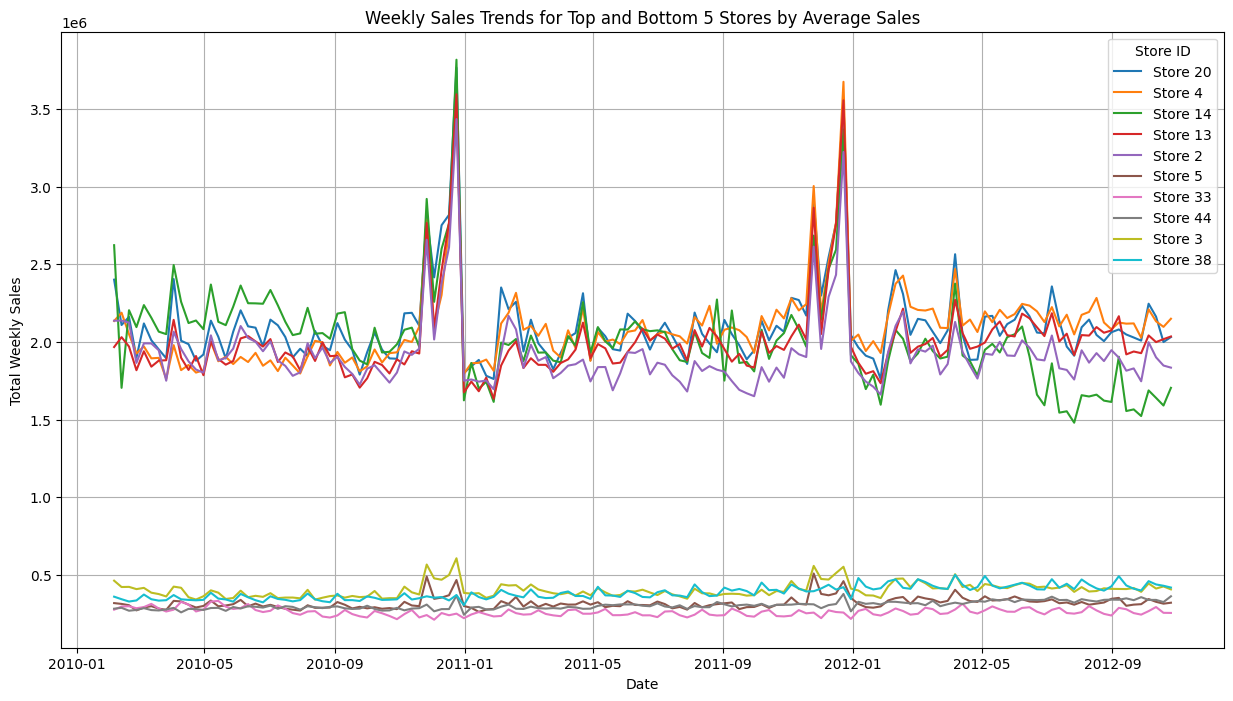


Store Type and Size for Selected Stores:
      Type    Size
Store             
20       A  203742
4        A  205863
14       A  200898
13       A  219622
2        A  202307
5        B   34875
33       A   39690
44       C   39910
3        B   37392
38       C   39690


In [24]:
store_avg_sales = df[df['source'] == 'train'].groupby('Store')['Weekly_Sales'].mean().reset_index()

# Sort stores by average sales to find top and bottom
top_stores = store_avg_sales.sort_values(by='Weekly_Sales', ascending=False).head(5)
bottom_stores = store_avg_sales.sort_values(by='Weekly_Sales', ascending=True).head(5)

print(f"\nTop {5} Stores by Average Weekly Sales:")
print(top_stores)
print(f"\nBottom {5} Stores by Average Weekly Sales:")
print(bottom_stores)

# Combine the list of top and bottom store IDs
selected_stores = pd.concat([top_stores, bottom_stores])['Store'].unique()

plt.figure(figsize=(15, 8))

# Plot sales trend for each selected store
for store_id in selected_stores:
    store_df = df[(df['Store'] == store_id) & (df['source'] == 'train')].groupby('Date')['Weekly_Sales'].sum().reset_index()
    # Optional: Color code top vs bottom if desired
    # color = 'green' if store_id in top_stores['Store'].values else 'red'
    sns.lineplot(data=store_df, x='Date', y='Weekly_Sales', label=f'Store {store_id}') # , color=color)

plt.title(f'Weekly Sales Trends for Top and Bottom {5} Stores by Average Sales')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.legend(title='Store ID')
plt.show()

# Optional: Compare their Store Type and Size
print("\nStore Type and Size for Selected Stores:")
store_info = df[df['Store'].isin(selected_stores)][['Store', 'Type', 'Size']].drop_duplicates().set_index('Store')
print(store_info.loc[selected_stores]) # Print in the order of selected_stores

Top / Bottom Departments


Top 10 Departments by Total Sales:
    Dept  Weekly_Sales
73    92  4.839433e+08
76    95  4.493202e+08
36    38  3.931181e+08
60    72  3.057252e+08
71    90  2.910685e+08
38    40  2.889360e+08
1      2  2.806112e+08
72    91  2.167817e+08
12    13  1.973216e+08
7      8  1.942808e+08

Bottom 10 Departments by Total Sales:
    Dept  Weekly_Sales
56    60    2005020.96
51    54     516294.63
80    99     358149.85
62    77      49344.27
43    45      44937.63
49    51      30572.83
63    78       1714.71
37    39        177.98
41    43         14.32
45    47      -4962.93


C:\Users\cfmor\AppData\Local\Temp\ipykernel_26776\2768229643.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_sales.head(10), x='Dept', y='Weekly_Sales', palette='viridis')


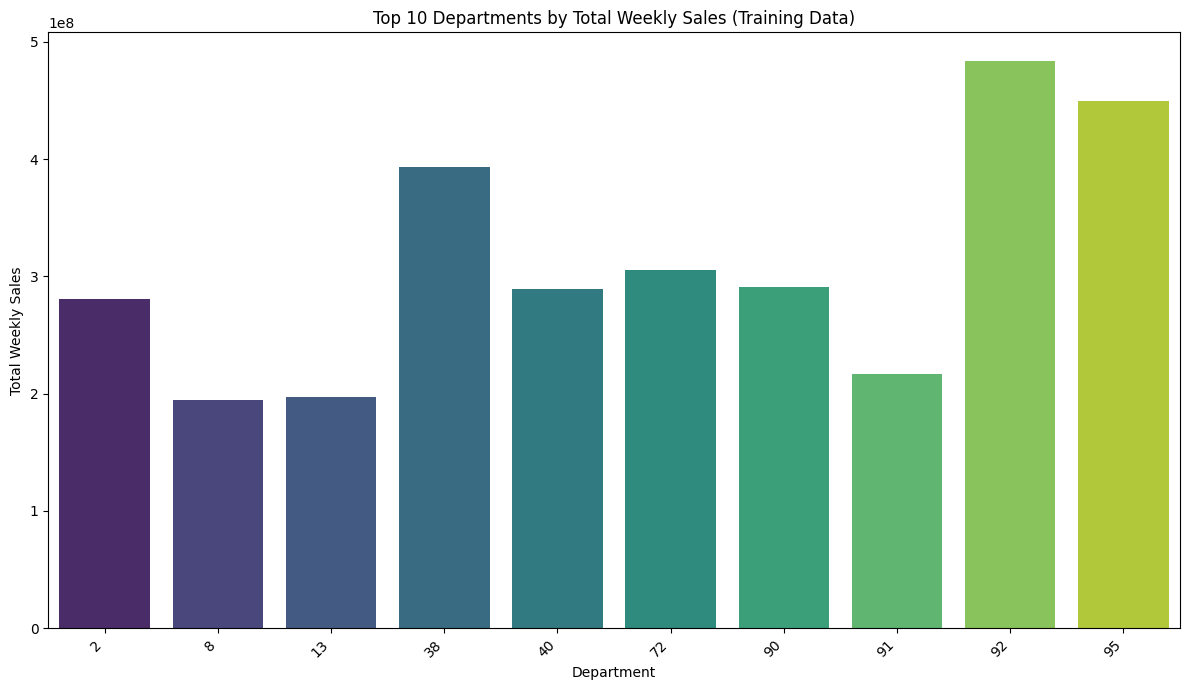

In [ ]:
# Calculate total sales per department across all stores and weeks (using training data only)
dept_sales = df[df['source'] == 'train'].groupby('Dept')['Weekly_Sales'].sum().reset_index()
dept_sales = dept_sales.sort_values(by='Weekly_Sales', ascending=False)

print("\nTop 10 Departments by Total Sales:")
print(dept_sales.head(10))
print(f"\nBottom 10 Departments by Total Sales:")
print(dept_sales.tail(10)) # Includes departments with very low or negative total sales

# Visualize top N departments
plt.figure(figsize=(12, 7))
sns.barplot(data=dept_sales.head(10), x='Dept', y='Weekly_Sales', palette='viridis')
plt.title(f'Top {10} Departments by Total Weekly Sales (Training Data)')
plt.xlabel('Department')
plt.ylabel('Total Weekly Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Correlation with External Features


Aggregated data sample for correlation analysis:
        Date  Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  \
0 2010-02-05   49750740.50    33.277942    2.717869  167.398405      8.576731   
1 2010-02-12   48336677.63    33.361810    2.696102  167.384138      8.567309   
2 2010-02-19   48276993.78    37.038310    2.673666  167.338966      8.576351   
3 2010-02-26   43968571.13    38.629563    2.685642  167.691019      8.561375   
4 2010-03-05   46871470.30    42.373998    2.731816  167.727351      8.572689   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  
0        0.0        0.0        0.0        0.0        0.0  
1        0.0        0.0        0.0        0.0        0.0  
2        0.0        0.0        0.0        0.0        0.0  
3        0.0        0.0        0.0        0.0        0.0  
4        0.0        0.0        0.0        0.0        0.0  

Correlation Matrix (Weekly_Sales vs External Features):
              Weekly_Sales
Weekly_Sales      1.00000

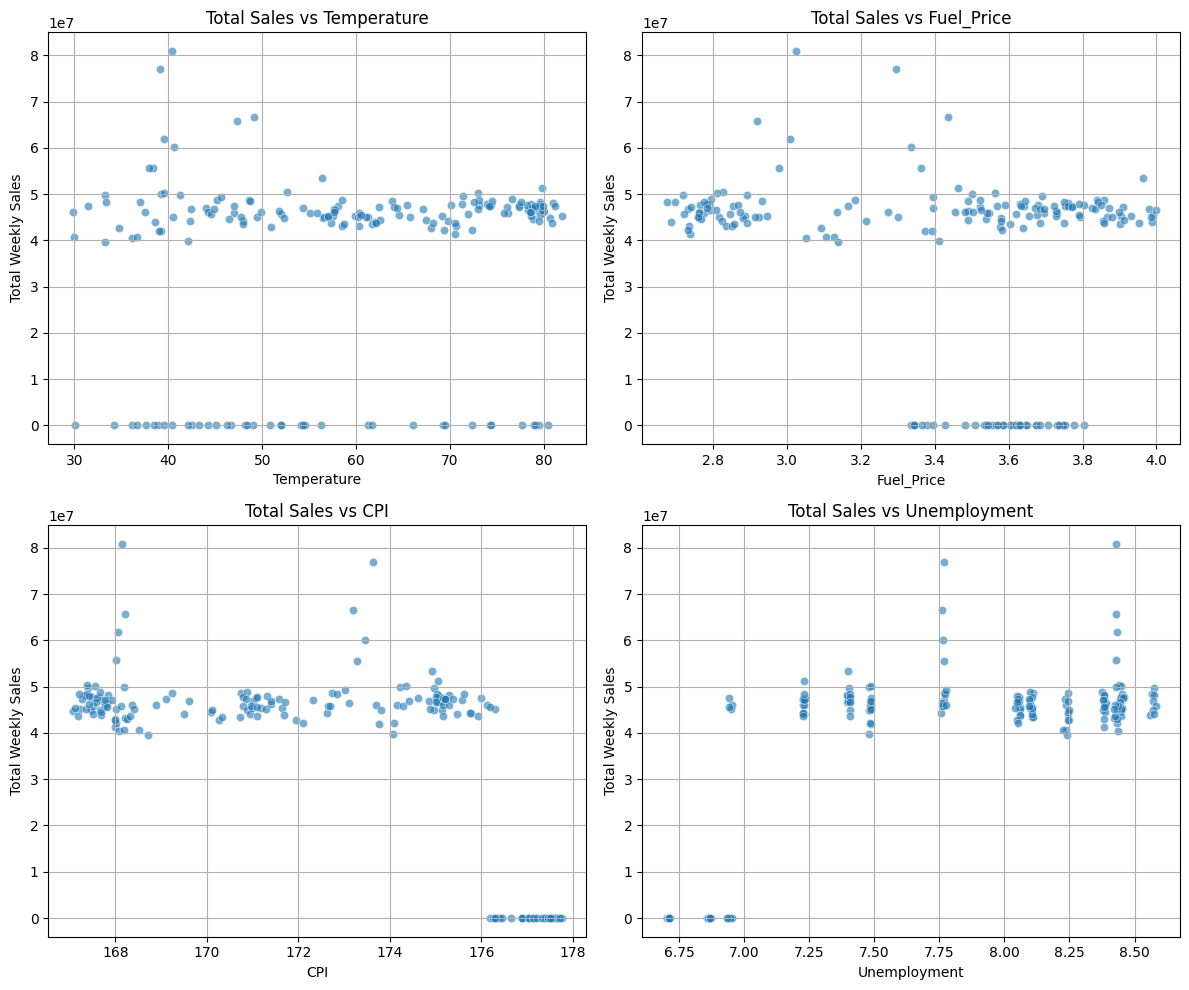

In [29]:
sales_by_date = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# Aggregate features by Date (average across stores)
features_agg_by_date = df.groupby('Date')[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean().reset_index()

# Merge aggregated sales and features
combined_agg = pd.merge(sales_by_date, features_agg_by_date, on='Date', how='inner')

print("\nAggregated data sample for correlation analysis:")
print(combined_agg.head())

# Calculate correlation matrix
correlation_matrix = combined_agg.corr()

print("\nCorrelation Matrix (Weekly_Sales vs External Features):")
print(correlation_matrix[['Weekly_Sales']].sort_values(by='Weekly_Sales', ascending=False))

# Visualize correlations (Scatter plots for key relationships)
external_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'] # Exclude MarkDowns for simple scatter
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten() # Flatten the 2x2 grid of axes for easy iteration

for i, col in enumerate(external_features):
    sns.scatterplot(data=combined_agg, x=col, y='Weekly_Sales', ax=axes[i], alpha=0.6)
    axes[i].set_title(f'Total Sales vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Total Weekly Sales')
    axes[i].grid(True)

plt.tight_layout()
plt.show()
